# STAT 201 FINAL PROJECT REPORT


#### GROUP #23: Zihua Li, Alex Pan Wang, Kaylan Wallace, Tim Zeng
<br>

Notes from proposal:

- for the graphs you should show and explain more what were seeing and how there is signifcant difference between low cholestrol and high cholestrol. You couldve put 2 graphs side by side and check for overlap. 
- The methods were solid but a bit more explanation about how the confidence intervals fit into the analysis (why understanding the degree of uncertainty is important) would have been nice. The charts are well labeled and presented, but the graphs in figure 2 have slightly different scales so it makes it a bit harder to interpret what the graph is communicating.  

# **Cholesterol Levels and Heart Disease: A Comparative Analysis of Risks**

In [1]:
# import libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


<br><br>
## __Introduction__:
Heart disease is a global health concern encompassing conditions affecting the heart and blood vessels. High cholesterol levels, defined as >=240mg/dL (Johns Hopkins Medicine, 2020), are a recognized risk factor associated with heart disease. 
Cholesterol is a fatty substance found in our cells and diet that is crucial in cellular functions and hormone production. However, elevated cholesterol levels can lead to plaque buildup in arteries, constraining blood flow and raising the risk of heart-related issues. In recent years, heart disease has witnessed a substantial rise in fatalities, with a surge of over 2 million deaths since 2000, reaching 8.9 million deaths by 2019 (WHO, 2020). Maintaining healthy cholesterol levels is imperative for mitigating the risk of heart disease, highlighting the importance of monitoring and managing cholesterol levels.
<br><br>
#### __Research question__

Our study seeks to investigate the relationship between cholesterol levels and the incidence of heart disease. Specifically, we aim to answer the following question: 

>  Is there a significant difference in the proportions of patients diagnosed with heart disease between those with high cholesterol levels (defined as ≥240mg/dL) and those with normal or below-average cholesterol levels?

<br>

#### __Choice of parameter__
Proportion in High Cholesterol Group: 
-  The proportion (or percentage) of patients who have high cholesterol levels (≥240mg/dL as per your definition) and are diagnosed with heart disease.

Proportion in Normal/Below-Average Cholesterol Group: 
-  The proportion of patients who have normal or below-average cholesterol levels (less than 240mg/dL) and are diagnosed with heart disease.
<br><br>
#### __Dataset description__
We will use the Heart Disease dataset from the UC Irvine Machine Learning Repository. It has 14 attributes measured across three geographic samples. We will use a subset of the original dataset, namely the age, cholesterol levels measured in milligrams per deciliter of blood (mg/dl), and diagnosis for patients from Cleveland. By analyzing the data, our research will provide insights into how cholesterol levels correlate with heart disease diagnoses and potentially guide more effective health interventions.
<br><br>
#### __Response Variable__
The response variable in our study is the diagnosis of heart disease.
<br><br>
#### __Explanatory Variable__
The explanatory variable in our study is the cholesterol level of the patients, categorized into two groups: high cholesterol levels (≥240mg/dL) and normal or below-average cholesterol levels (below 240mg/dL).
<br><br>

<br><br>
***
## Preliminary Results:
#### __Data Acquisition__
To begin our analysis, we will access the Heart Disease dataset, specifically the subset of data pertaining to patients from the Cleveland clinic. This dataset is available in CSV format from the UC Irvine Machine Learning Repository. The dataset was created by renowned cardiologists with more than 300 samples. It has been cited 64 times and was published in the American Journal of Cardiology; therefore, we can conclude the data is authentic, authoritative, trustworthy, and generalizable to the population we wish to explore.

In [20]:
# STEP 1: Read the data from the web 
data <- read.table("https://raw.githubusercontent.com/Kaylan-W/STAT-201-Final-Project/main/data/processed.cleveland.data", 
                   sep = ",", header = FALSE, na.strings = "?")
 
# Assign column names to the dataframe
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

<br><br>
##### Table 1: Subset of the raw data

In [21]:
head(data) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


<br><br>
#### __Exploratory Data Analysis__
In the next phase, we focus on cleaning and organizing the data for our analysis. We first refine the diagnosis (num) column. Here, a value of '0' is redefined to represent the 'absence' of heart disease, whereas values '1', '2', '3', and '4' are categorized as indicating the 'presence' of heart disease. This categorization simplifies the dataset into a binary classification system, essential for our analysis and ease of interpretation.

Then, we transform the cholesterol (chol) column. Using a threshold of 240mg/dL, cholesterol levels equal to or above the threshold are labeled as 'High', while those below are classified as 'Normal/Below-Average'.

To illustrate the relationship between the variables, we construct a bar plot. This visual representation will aid in discerning any apparent trends or patterns between cholesterol levels and heart disease diagnoses.

Lastly, we select only the relevant columns for our study and eliminating any rows with missing values (NA). In addition, also we calculate the necessary statistical parameters for our study.

In [17]:
# STEP 2: Clean and wrangle data
# Tidy target column by combining values to make a binary feature
mutate_num <- data %>%
    mutate(diagnosis = case_when(num == 0 ~ "absence",
                                 num == 1 ~ "presence",
                                 num == 2 ~ "presence",
                                 num == 3 ~ "presence",
                                 num == 4 ~ "presence"))

# Set threshold value for categorization 
threshold = 240

# Turn chol into a categorical variable with the categories "High Chol" and "Normal/Below-Avg Chol"
mutate_chol <- mutate_num %>%
    mutate(chol_level = case_when(chol >=  threshold ~ "High",
                                  chol < threshold ~ "Normal/Below-Avg"))


# Select relevant columns and handle NA values. 
data_downsized<- mutate_chol %>%
        select(age, chol, chol_level, diagnosis, -num) %>%
        na.omit()


#STEP 3: Compute estimates of the parameter identified across groups.
prop_diagnosis_by_chol <- data_downsized %>%
  group_by(chol_level) %>%
  summarise(disease_count = sum(diagnosis == "presence"),
            n = n(),
            proportion = disease_count / n,
            mean_chol = mean(chol, na.rm = TRUE),
            median_chol = median(chol, na.rm = TRUE),
            sd_chol = sd(chol, na.rm = TRUE),
            var_chol = var(chol, na.rm = TRUE))

# STEP 4: Create a bar chart
prop_bar <- ggplot(data_downsized, aes(x = chol_level, fill = diagnosis)) +
  geom_bar() +
  labs(title = "Figure 1: Proportion of Patients with Heart Disease by Cholesterol Level",
       x = "Cholesterol Level",
       y = "Count",
       fill = "Heart Disease Diagnosis") +
  scale_fill_manual(values = c("absence" = "lightgreen", "presence" = "pink"))

<br><br>
##### Table 2: Proportion of Patients with Heart Disease by Cholesterol Level

In [19]:
prop_diagnosis_by_chol

chol_level,disease_count,n,proportion,mean_chol,median_chol,sd_chol,var_chol
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,80,156,0.5128205,284.4423,274,41.63888,1733.7967
Normal/Below-Avg,59,147,0.4013605,206.6327,211,23.79510,566.2066


<br><br>

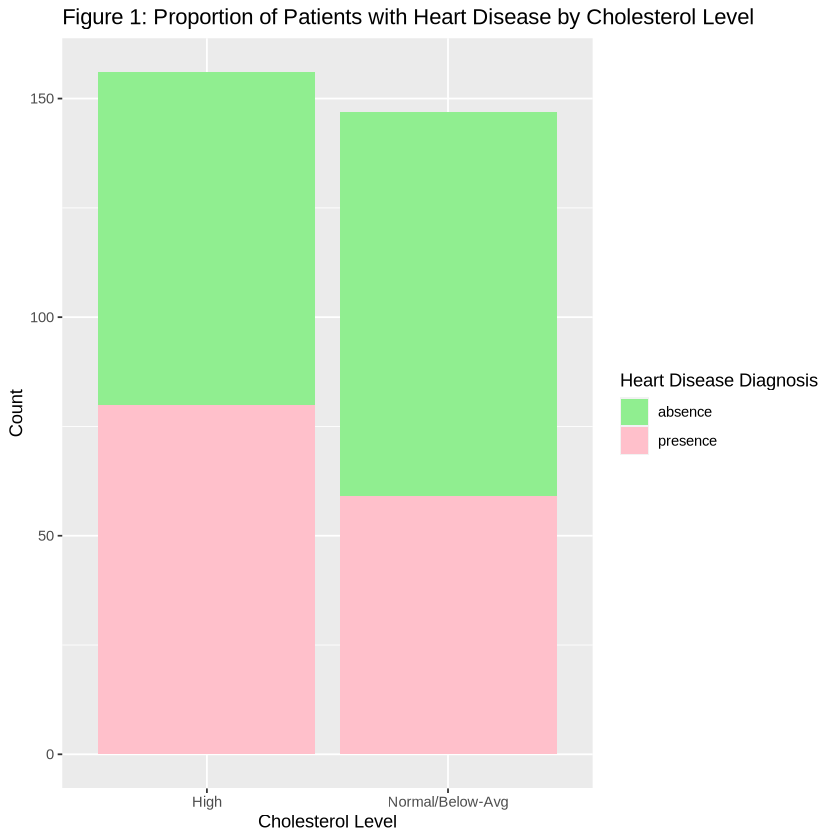

In [18]:
prop_bar

<br>
By looking at the plot, it appears that patients with high cholesterol level are more likely to diagnosis with heart disease. We will quantify the diagnosis rate by computing the proportion of patient diagnosis with heart disease in each group.

<br>

##### Table 3: Tally of Diagnosis Type by Cholesterol Level

In [4]:
data_downsized |>
    group_by(chol_level, diagnosis) |>
    tally()

chol_level,diagnosis,n
<chr>,<chr>,<int>
High,absence,76
High,presence,80
Normal/Below-Avg,absence,88
Normal/Below-Avg,presence,59


<br>
In our dataset, of the patients with high cholesterol levels, 80 were diagnosed with the presence of heart disease, out of a total of 156 (including both presence and absence). This results in a proportion of 51.3%
<br><br>
Conversely, for patients with normal or below-average cholesterol levels, 59 out of 147 were diagnosed with the presence of heart disease, for a proportion of 40.1%
<br><br>
It seems that patients with high cholesterol are diagnosed with heart disease at an 11.2% higher rate, suggesting a correlation between high cholesterol levels and the incidence of heart disease. But does this difference provide definitive proof that high cholesterol is a direct cause of increased heart disease diagnoses? To investigate this further and assess the significance of our findings, we will conduct hypothesis testing.

<br><br>
***
## Methods:

#### __Plan:__

In the initial explorations of the data, including summary statistics and visualizations, have give us an understanding of cholesterol levels and their association with heart disease. However, these exploratory tools alone are not adequate for informed decision-making. We will conduct hypothesis testing and constructing confidence intervals, which are vital for finding the statistical significance and reliability of our observed differences.
#### __Hypothesis Testing__
**Hypothesis test** for the difference in proportion:

$H_0$: Patients with high cholesterol levels and patients with normal cholesterol levels are diagnoses with cancer at the same rate.
>$H_0$: $p_1$ - $p_2$ $=$ $0$

$H_1$: Patients with high cholesterol levels are diagnoses with cancer at higher rate than patients with normal cholesterol levels.
>$H_1$: $p_1$ - $p_2$ $>$ $0$

- Let $p_1$ represent the proportion of the patients with the high cholesterol levels diagnosis with cancer. 

- Let $p_2$ represent the proportion of the patients with the normal/below-average cholesterol level values.
<br><br>
#### __Test statistic__
In the context of our project, we consider the two samples to be patients with high cholesterol levels and patients with normal or below-average cholesterol levels. Thus, our point estimate of interest is the difference in sample proportions between these two groups. 
<br><br>
#### __Observed test statistic__
In our study, the observed proportions of heart disease diagnoses are 51.3% in the high cholesterol group and 40.1% in the normal/below-average cholesterol group, resulting in an observed difference of 11.2%.
<br><br>
#### __Hypothesis tests with Bootstraping method:__
We will conduct the hypothesis tests by using the infer workflow to generate replicates of the dataset, assuming the null hypothesis is true, using permutation.

<br><br>
##### Table 4: Head of the Generated Null Distribution

In [5]:
set.seed(123)

null_distribution <- data_downsized %>% 
  specify(formula = diagnosis ~ chol_level, success = "presence") %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("High", "Normal/Below-Avg"))

head(null_distribution)

replicate,stat
<int>,<dbl>
1,0.018969126
2,-0.007456829
3,-0.086734694
4,-0.060308739
5,-0.047095761
6,-0.073521716


<br>

We have 1000 instances of the test statistic, each one representing a potential difference in the proportion of patients with heart disease between those with high cholesterol levels and those with normal or below-average cholesterol levels. This array of values forms our `null_distribution`. 

This null distribution is key to our hypothesis testing as it represents the variation of our test statistic in a scenario where there is no actual association between cholesterol levels and heart disease diagnoses.

Now we can compute the observed test value.

In [30]:
obs_diff_prop <- data_downsized %>% 
  specify(formula = diagnosis ~ chol_level, success = "presence") %>% 
  calculate(stat = "diff in props", order = c("High", "Normal/Below-Avg"))

cat("Observed test value =", obs_diff_prop$stat)

Observed test value = 0.11146

<br><br>
Now we visualize the null distribution and plug in the observed difference using the `shade_p_value()` function. We'll set the `direction = "right"`, reflecting our alternative hypothesis. "More extreme" in this context corresponds to differences that are "larger" or "more positive".

<br><br>
##### Figure 2: The Null Distibution and Observed Difference in Proportions

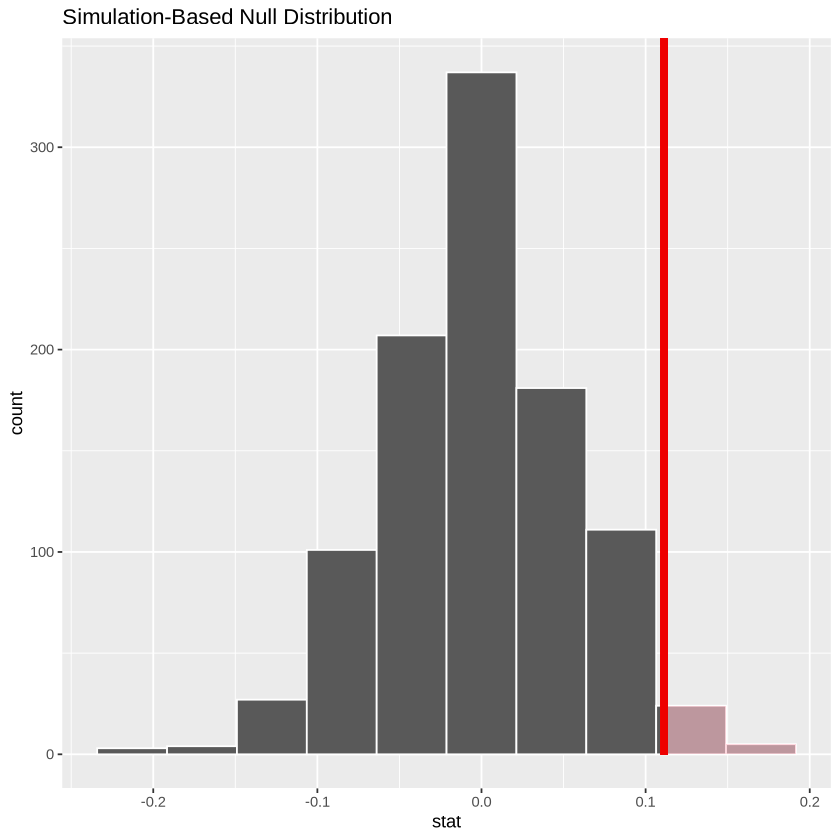

In [36]:
visualize(null_distribution, bins = 10) +
    shade_p_value(obs_stat = obs_diff_prop, direction = "right")

<br>

**Figure 2** represents a simulation-based null distribution, and the solid red line indicates the observed difference in proportions. The shaded area to the right of this line corresponds to the p-value. The **p-value** is the probability of observing a test statistic as extreme as, or more extreme than, what was observed in our data, assuming that the null hypothesis is true.

By examining the shaded region in the figure, it appears that the likelihood of observing a test statistic as extreme as the one indicated by the solid line in **Figure 2** is quite low. This suggests that the observed difference is statistically significant. In the context of our study, if this shaded region represents the p-value for the difference in heart disease rates between patients with high and normal/below-average cholesterol levels, it seems that we would rarely observe such a difference if cholesterol levels actually had no real effect on heart disease.

To get the exact value of the p-value, we can utilize a function such as `get_p_value()`. If the p-value is below our chosen significance level (0.05), we would reject the null hypothesis.

In [40]:
null_p_value <- null_distribution %>% 
  get_p_value(obs_stat = obs_diff_prop, direction = "right")

cat("Calculated p-value =", null_p_value$p_value)


Calculated p-value = 0.029

<br>

The calculated **p-value** from our analysis is 0.029, or 2.9%. Since this p-value is less than our predetermined significance level of α = 0.05, we reject the null hypothesis. This p-value is small enough to discard our initial assumption of no difference in heart disease rates based on cholesterol levels. We now have sufficient evidence to support the claim that high cholesterol levels are associated with higher rates of heart disease diagnoses. It's important to note that the decision to reject the null hypothesis is primarily influenced by our chosen significance level α.

Now we will create a bootstrap distribution from which to calculate a **95% confidence interval**.
<br>

In [41]:
bootstrap_distribution <- data_downsized %>% 
    specify(formula = diagnosis ~ chol_level, success = "presence") %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in props", order = c("High", "Normal/Below-Avg"))

<br>

Using the `bootsrap_distribution`, we will calculate percentile-based confidence intervals to establish a 95% confidence interval. This interval will be provide a representation of the uncertainty associated with our findings.
<br><br>

In [49]:
percentile_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "percentile")


percentile_ci_viz <- visualize(bootstrap_distribution) + 
  shade_confidence_interval(endpoints = percentile_ci)

cat("Lower bound of the percentile based confidence interval =", percentile_ci$lower_ci)
cat("\nUpper bound of the percentile based confidence interval =", percentile_ci$upper_ci)

Lower bound of the percentile based confidence interval = 0.005129997
Upper bound of the percentile based confidence interval = 0.2227457

<br><br>
##### Figure 3: 95% Percentile Based Confidence Interval for the Bootstrap Distribution

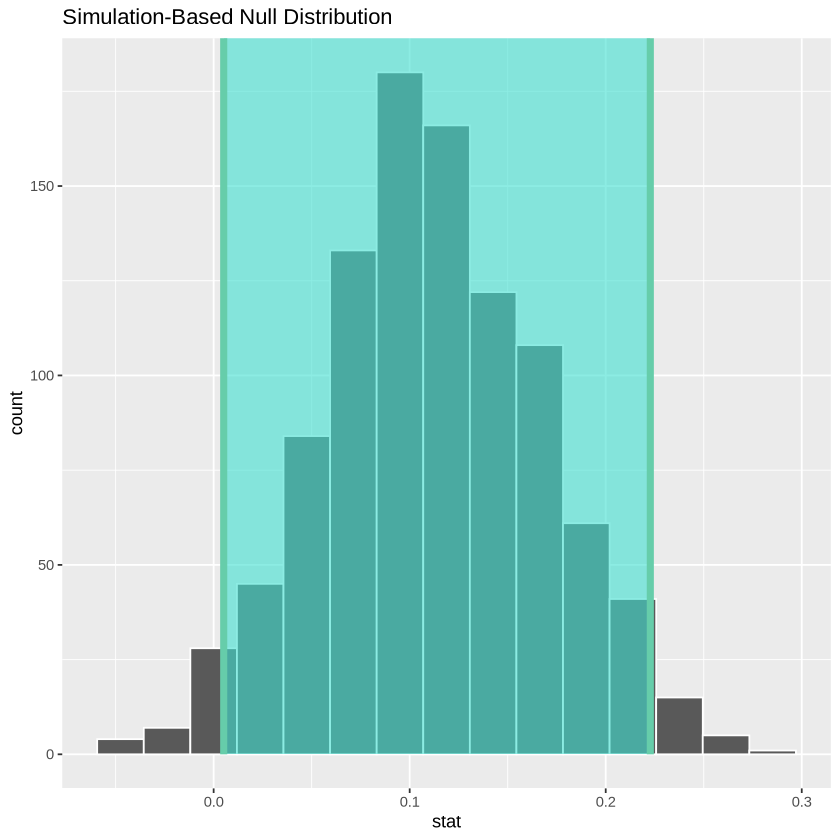

In [51]:
percentile_ci_viz

<br>

Looking at **Figure 3**, it is noteworthy that the value 0 is positioned outside of the 95% confidence interval for the difference in proportions. The exclusion of 0 from this interval implies a significant divergence, suggesting a real difference between the two compared proportions.

Given the approximately normal shape of the bootstrap distribution presented, we can employ the standard error method for further analysis:

In [52]:
se_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = obs_diff_prop)
 
cat("Lower bound of the standard error based confidence interval =", se_ci$lower_ci)
cat("\nUpper bound of the standard error based confidence interval =", se_ci$upper_ci)

se_ci_viz <- visualize(bootstrap_distribution) + 
  shade_confidence_interval(endpoints = se_ci)

Lower bound of the standard error based confidence interval = 0.001873707
Upper bound of the standard error based confidence interval = 0.2210462

<br><br>
##### Figure 4: 95% Standard Error Based Confidence Interval for the Bootstrap Distribution

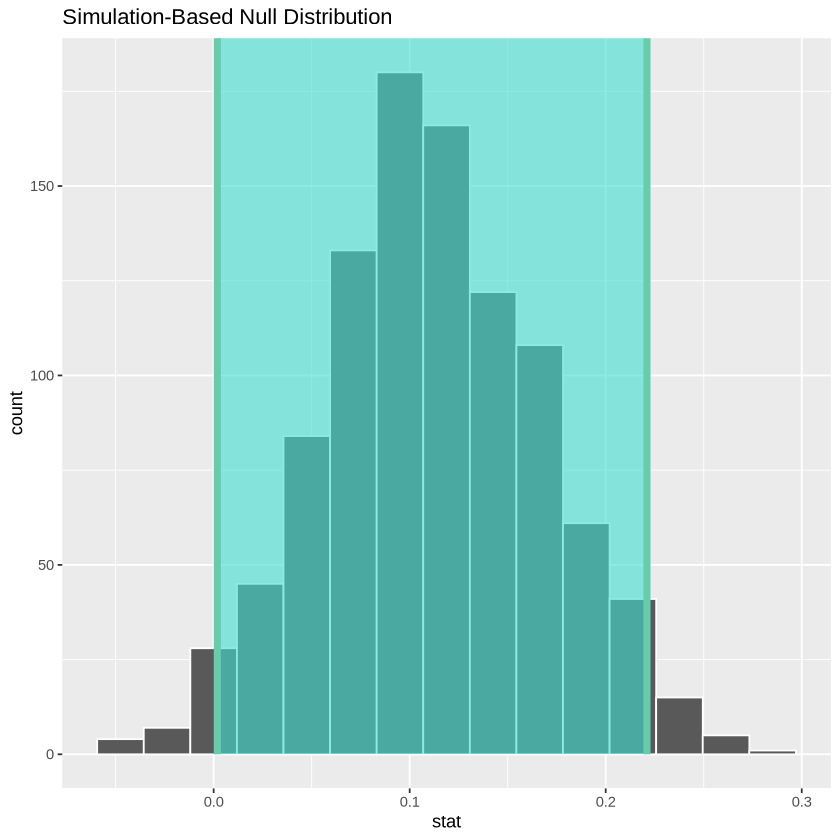

In [53]:
se_ci_viz

We have calculated the confidence intervals in two ways, by using **Percentile-based** and **Standard Error methods**.

The lower interval bound decreased in Standard Error method, while the upper bound decreased in Percentile-based method.
<br><br>
#### __Difference between Percentile-Based and Standard Error methods__

We use the standard error method when the bootstrap distribution is approximately normal shape. But, if the distribution isn't approximately normal shape, we should consider to use the percentile method.

- The Percentile method sets the lower endpoint of the confidence interval at the 2.5th percentile of the bootstrap distribution and similarly sets the upper endpoint at the 97.5th percentile. The resulting interval captures the middle 95% of the values of the sample mean in the bootstrap distribution.

- The Standard Error method constructs 95% confidence intervals and for any distribution that is normally shaped, roughly 95% of the values lie within two standard deviations of the mean.

-  Upon comparison, both methods shows similar confidence intervals, with the lower and upper bounds aligning closely. The consistency between the two methods enhances the credibility of our findings, iZt indicates that our point estimate for the difference in proportions is stable. This strengthens our confidence in the conclusion that there is a statistically significant difference in the rates of heart disease diagnosis between the two cholesterol level groups.

#### **Hypothesis Test with Asymptotic Method:**

Given that we are comparing proportions and not means, and that the population standard deviation is not relevant for proportions, we can use an asymptotic method that is suitable for large samples: the **prop.test** function for proportions, which will calculate the p-value and determine if the observed differences in proportions are statistically significant. 

Our sample size meets the minimum requirement of 30 (n > 30) for applying the Central Limit Theorem, and each samples are selected independetly; this allows us to use the asymptotic method for our analysis. We will maintain the 5% significance level to assess the significance of our findings.

We anticipate that both bootstrapping and asymptotic methods would give similar results, with potential minor difference.

We will set up the prop.test function with x being the number of patients diagnosed with heart disease in each group, and n being the total number of patients in each group:

In [1]:
x <- c(80, 59) 

n <- c(156, 147)  

test_result <- prop.test(x, n, alternative = "greater")

print(test_result)


	2-sample test for equality of proportions with continuity correction

data:  x out of n
X-squared = 3.3511, df = 1, p-value = 0.03358
alternative hypothesis: greater
95 percent confidence interval:
 0.01128455 1.00000000
sample estimates:
   prop 1    prop 2 
0.5128205 0.4013605 



The result shows the p-value is 0.03358, this value is less than the significance level of 0.05, suggesting that we can reject the null hypothesis in favor of the alternative.

Furthermore, the 95% confidence interval does not include 0 (ranging approximately from 0.0113 to 1), which furter support our finding that there is a statistically significant difference.

In conclusion, our analysis supports the hypothesis that high cholesterol levels are associated with an increased rate of heart disease diagnosis.

<br><br>

#### **Bootstrap Method versus Asymptotic Method:**

We employed both bootstrapping and asymptotic methods to determine the significance of our findings.

Using the bootstrapping method, we calculated a p-value of 0.029, indicating a statistically significant difference between the high cholesterol and normal cholesterol groups in the rate of heart disease diagnosis. The 95% confidence interval obtained through the percentile and standard error approach, both ranged from approximately 0.0051 to 0.2195.

The asymptotic method provided a p-value of 0.03358. The corresponding 95% confidence interval using this method spanned from 0.0113 to 1.0, again not including the null value and indicating statistical significance.

Given that the asymptotic method may be more efficient with large samples, while bootstrapping is more computationally demanding, the choice between these methods often depends on the sample size and distribution assumptions.

To conclude, the similarity between the p-values and confidence intervals from both methods suggests that our results are robust; it lends confidence to the conclusion that there is indeed a statistically significant difference in the rates of heart disease diagnosis between patients with high and normal cholesterol levels.

### Types of error:

In the context of our project, we are investigating whether there is a significant difference in the rate of heart disease diagnosis between patients with high cholesterol levels and those with normal cholesterol levels. Our null hypothesis ($H_0$) states that there is no difference between these rates, while the alternative hypothesis ($H_1$) states that there is a difference; patients with high cholesterol levels are diagnosed with heart disease at a higher rate than patients with normal cholesterol levels.

- Type I Error (False Positive):
A Type I error would occur if we conclude that there is a difference in the rate of heart disease diagnosis between the two groups (rejecting $H_0$) when in reality no such difference exists.

    For example: Rejecting $H_0$ and concluding that patients with high cholesterol have a higher rate of heart disease diagnosis compared to those with normal cholesterol levels when in fact, the rates are the same.

- Type II Error (False Negative):
A Type II error occurs if we fail to detect a true difference (failing to reject $H_0$) when there actually is one.

    For example: Failing to reject $H_0$ and conclude that the rate of heart disease diagnosis is the same for patients with high and normal cholesterol levels, when in reality there is a significant difference that we missed.
    
In our project, we must carefully choose our significance level (α) to minimize the risk of a Type I error or Type II error, which can be influenced by factors like sample size and effect size.

<br><br>
***
## Discussion:


In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found, and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss future questions/research this study could lead to.


For this report, we expect to uncover the difference in the proportions of those patients diagnosed with heart disease between patients in two groups - those with high cholesterol levels and those with normal or low cholesterol levels. We expect that those with high cholesterol will have a greater likelihood of heart disease.  
<br><br>
These findings could be informative in the medical field, but also in the average person's daily decision-making. If robust and compelling evidence shows that patients with higher cholesterol levels may have greater risks of heart disease, then citizens may recognize the need for lifestyle changes to reduce their cholesterol levels. In turn, the annual number of heart disease cases may decline in the long run.
 <br><br>
Some future questions to consider include: 
- Is a high cholesterol level the primary cause of heart disease? 
- Are there any other factors that will lead to heart disease? 
- Are older persons more at risk for heart disease than younger persons?
<br>
#### Table 1: Summary Statistics for Each Cholesterol Level

In [12]:
prop_diagnosis_by_chol

chol_level,disease_count,n,proportion,mean_chol,median_chol,sd_chol,var_chol
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,80,156,0.5128205,284.4423,274,41.63888,1733.7967
Normal/Below-Avg,59,147,0.4013605,206.6327,211,23.79510,566.2066


<br><br>
***
## References:

- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository: https://doi.org/10.24432/C52P4X
- Lipid panel. Johns Hopkins Medicine. (2020, December 4). https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL 
- World Health Organization: WHO. (2020, December 9). The top 10 causes of death. https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
- ModernDive, Chapter 8 Bootstrapping and Confidence Intervals: https://moderndive.com/8-confidence-intervals.html
- 4.4.1 - StatKey: Standard Error Method - STAT ONLINE: https://online.stat.psu.edu/stat200/book/export/html/90#:~:text=The%20standard%20error%20method%20can,percentile%20method%20must%20be%20used.